# Titanic: Machine Learning from Disaster

The goal is to use machine learning to create a model that predicts which passengers survived the Titanic shipwreck.

In [74]:
import pandas as pd

train_full_data = pd.read_csv('data/train.csv')
test_full_data = pd.read_csv('data/test.csv')

The attributes represents the following information:
* **Survived**: 0 if the passenger did not survive, 1 if passenger did survive.
* **Pclass**: passenger class
* **SibSp**: # of siblings & spouses of the passenger aboard the Titanic.
* **Parch**: # of children & parents of the passenger aboard the Titanic.
* **Ticket**: ticket id
* **Fare**: price paid (in pounds)
* **Cabin**: passenger's cabin number
* **Embarked**: where the passenger embarked the Titanic

In [75]:
train_full_data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [76]:
train_full_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


From the dataset we see that there are null values for *Age*, *Cabin*, and *Embarked*. For *Age*, the null values will be replaced by the median of the column. *Cabin* will be dropped as the NaN values can not be filled with arbituary values.

In [77]:
test_full_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
PassengerId    418 non-null int64
Pclass         418 non-null int64
Name           418 non-null object
Sex            418 non-null object
Age            332 non-null float64
SibSp          418 non-null int64
Parch          418 non-null int64
Ticket         418 non-null object
Fare           417 non-null float64
Cabin          91 non-null object
Embarked       418 non-null object
dtypes: float64(2), int64(4), object(5)
memory usage: 36.0+ KB


## Getting Insight into Data

We create pivot tables to get useful insight in the data.

In [78]:
train_full_data[['Fare', 'Survived']].groupby(['Survived']).mean().sort_values(by='Fare', ascending=False)

,Fare
Survived,
1,48.395408
0,22.117887


The table above shows the passengers who survived payed a higher price for the fare. To get more insight into the difference between passengers who survived and didn't survive, we look at *Pclass*, *Sex*, *SibSp*, and *Parch.

In [79]:
train_full_data[['Pclass', 'Fare']].groupby(['Pclass']).mean().sort_values(by='Fare', ascending=False)

,Fare
Pclass,
1,84.154687
2,20.662183
3,13.675550


In [80]:
train_full_data[['Pclass', 'Survived']].groupby(['Pclass']).mean().sort_values(by='Survived', ascending=False)

,Survived
Pclass,
1,0.629630
2,0.472826
3,0.242363


The first table describes the mean price for the three *Pclass* and the chance the passenger survived. The tables shows that *Pclass* with 1 has the highest price meaning that the passengers had better rooms or services, and another evidence that the chance of surviving increased with passengers paying higher fare prices.

In [81]:
train_full_data[['Sex', 'Survived']].groupby(['Sex']).mean().sort_values(by='Survived', ascending=False)

,Survived
Sex,
female,0.742038
male,0.188908


The pivot table shows that female had a higher chance of surviving than male.

In [82]:
train_full_data[['Survived', 'SibSp', 'Parch']].groupby(['Survived']).mean().sort_values(by='SibSp', ascending=False)

,SibSp,Parch
Survived,,
0,0.553734,0.329690
1,0.473684,0.464912


The table shows that passengers with more siblings and spouses had a smaller chance of surviving. On the other hand, passengers with more parents onboard had a higher chance of surviving. Since *SibSp* and *Parch* both represent the amount of family onboard, we create one column called *NumFamily* which is the sum of the two columns.

In [83]:
train_full_data['NumFamily'] = train_full_data['SibSp'] + train_full_data['Parch']
train_full_data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,NumFamily
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,1
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,1
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,0


In [84]:
train_full_data[['NumFamily', 'Survived']].groupby(['NumFamily']).mean().sort_values(by='Survived', ascending=False)

,Survived
NumFamily,
3,0.724138
2,0.578431
1,0.552795
6,0.333333
0,0.303538
4,0.200000
5,0.136364
7,0.000000
10,0.000000


From the table above we can see that there is no clear trend between the number of family onboard the ship and the chance of the passenger surviving.

## Data Visualization

To get a better understanding of the relationship between variables, we plot visualizations.

In [85]:
import matplotlib.pyplot as plt
import seaborn as sns

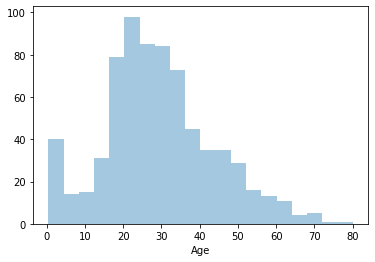

In [86]:
sns.distplot(train_full_data['Age'], kde=False)

The histogram shows that most people on the ship are younger than 40 years old. 

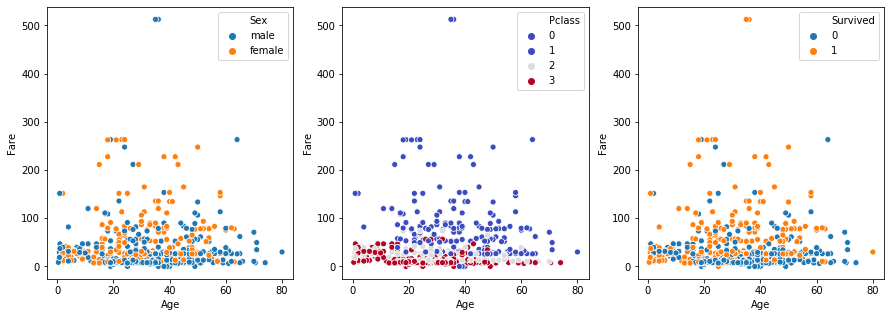

In [87]:
plt.figure(figsize=(15, 5))
plt.subplot(1, 3, 1)
sns.scatterplot(x = "Age", y = "Fare", hue="Sex", data = train_full_data)

plt.subplot(1, 3, 2)
sns.scatterplot(x = "Age", y = "Fare", hue="Pclass", palette="coolwarm", data = train_full_data)

plt.subplot(1, 3, 3)
sns.scatterplot(x = "Age", y = "Fare", hue="Survived", data = train_full_data)

The three graphs shows the same information we found using pivot tables visually. Passengers who survived typically paid higher prices for the fare, more females paid prices over 200 pounds for the fare than male did, and *Pclass* with one also had higher prices than the other *Pclass*. 

/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/seaborn/axisgrid.py:728: UserWarning: Using the barplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)


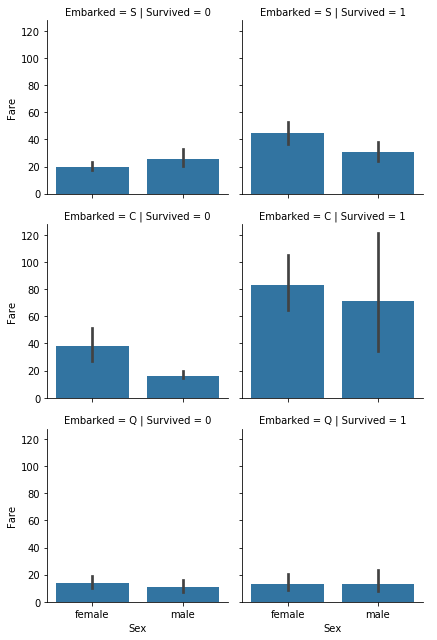

In [88]:
embark = sns.FacetGrid(train_full_data, row='Embarked', col='Survived')
embark.map(sns.barplot, 'Sex', 'Fare')
embark.add_legend()

We can see that survived passengers embarking from S and C paid higher fares, but from Q we do not see such trend. 

## Preparing the Data

In [89]:
import re
import numpy as np

We create two new columns *Honorifics* and *LetterTicket*. *Honorifics* checks if honorifics are included in each passenger's name and is classified into five categories: Mr, Mrs, Miss, Master and other. *LetterTicket* checks if letters are included in the ticket. 1 if letter is included, 0 if not.

In [90]:
honorifics = []

for x in range(len(train_full_data['Name'])):
    match = re.findall("([A-Za-z]+)\.", train_full_data['Name'].iloc[x])

    if match[0] in ['Mr', 'Mrs', 'Miss', 'Master']:
        honorifics.append(match[0])
    else:
        honorifics.append("Other")
        
train_full_data['Honorifics'] = honorifics

In [91]:
LetterTicket = []

for x in range(len(train_full_data['Ticket'])):
    match = re.search("[A-Z]+", train_full_data['Ticket'].iloc[x])

    if match:
        LetterTicket.append(1)
    else:
        LetterTicket.append(0)
        
train_full_data['LetterTicket'] = LetterTicket

In [92]:
# check if there are 891 entries for new columns
train_full_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 15 columns):
PassengerId     891 non-null int64
Survived        891 non-null int64
Pclass          891 non-null int64
Name            891 non-null object
Sex             891 non-null object
Age             714 non-null float64
SibSp           891 non-null int64
Parch           891 non-null int64
Ticket          891 non-null object
Fare            891 non-null float64
Cabin           204 non-null object
Embarked        889 non-null object
NumFamily       891 non-null int64
Honorifics      891 non-null object
LetterTicket    891 non-null int64
dtypes: float64(2), int64(7), object(6)
memory usage: 104.5+ KB


We drop columns that are not necessary.

In [93]:
train_data = train_full_data.drop(columns=['SibSp', 'Parch', 'Cabin', 'Name', 'Ticket', 'PassengerId'])
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 9 columns):
Survived        891 non-null int64
Pclass          891 non-null int64
Sex             891 non-null object
Age             714 non-null float64
Fare            891 non-null float64
Embarked        889 non-null object
NumFamily       891 non-null int64
Honorifics      891 non-null object
LetterTicket    891 non-null int64
dtypes: float64(2), int64(4), object(3)
memory usage: 62.8+ KB


The *Embarked* column has two Null values. We check where the null values are located and drop them.

In [94]:
train_data[train_data['Embarked'].isnull()].index.tolist()

[61, 829]

In [96]:
train_data = train_data.drop(train_data.index[[61, 829]])
train_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 889 entries, 0 to 890
Data columns (total 9 columns):
Survived        889 non-null int64
Pclass          889 non-null int64
Sex             889 non-null object
Age             712 non-null float64
Fare            889 non-null float64
Embarked        889 non-null object
NumFamily       889 non-null int64
Honorifics      889 non-null object
LetterTicket    889 non-null int64
dtypes: float64(2), int64(4), object(3)
memory usage: 69.5+ KB


Now that the dataset is complete, we standarize the numerical columns and change the non-numerical columns into categorical variables using `OrdinalEncoder` and `OneHotEncoder`

In [97]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler, OrdinalEncoder, OneHotEncoder
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer

In [98]:
num_pipeline = Pipeline([
    ("imputer", SimpleImputer(strategy="median")),
    ("standarize", StandardScaler())
])

In [99]:
num = ["Age", "Fare", "NumFamily"]
ord_enc = ["Pclass", "Sex", "LetterTicket"]
one_hot_enc = ["Embarked", "Honorifics"]
target = ["Survived"]

full_pipeline = ColumnTransformer([
    ("num_column", num_pipeline, num),
    ("ord_enc", OrdinalEncoder(), ord_enc),
    ("one_hot_enc", OneHotEncoder(), one_hot_enc),
    ("target", "passthrough", target)
])

In [100]:
titanic_prepared = full_pipeline.fit_transform(train_data)

In [103]:
titanic_train = pd.DataFrame(titanic_prepared)
titanic_train.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14
0,-0.563674,-0.500240,0.057853,2.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0
1,0.669217,0.788947,0.057853,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0
2,-0.255451,-0.486650,-0.561804,2.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0
3,0.438050,0.422861,0.057853,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0
4,0.438050,-0.484133,-0.561804,2.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0


## Selecting and Training Model

### Using Machine Learning Algorithm

We use cross-validation to check which machine learning algorithm produces the highest accuracy using cross-validation.

In [143]:
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.cluster import KMeans
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.mixture import GaussianMixture
from sklearn.svm import LinearSVC, SVC
from sklearn.tree import DecisionTreeClassifier

from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.model_selection import cross_val_score

In [112]:
train = titanic_train.loc[:, titanic_train.columns != 14]
test = titanic_train.loc[:, titanic_train.columns == 14]

In [113]:
X_train, X_valid, y_train, y_valid = train_test_split(train, test, test_size=0.2)

In [146]:
def display_scores(scores):
    """
    display list of scores, mean, and standard deviation
    """
    print("Scores:", scores)
    print("Mean:", scores.mean())
    print("Std:", scores.std())

In [147]:
# RandomForestClassifier
scores = cross_val_score(RandomForestClassifier(), train, test.values.ravel(), scoring="accuracy", cv=10)
display_scores(scores)

Scores: [0.74157303 0.85393258 0.74157303 0.80898876 0.85393258 0.86516854
 0.78651685 0.73033708 0.82022472 0.82954545]
Mean: 0.803179264555669
Std: 0.04815414647115755


In [148]:
# AdaBoostClassifier
scores = cross_val_score(AdaBoostClassifier(), train, test.values.ravel(), scoring="accuracy", cv=10)
display_scores(scores)

Scores: [0.78651685 0.84269663 0.78651685 0.85393258 0.79775281 0.7752809
 0.80898876 0.83146067 0.83146067 0.82954545]
Mean: 0.8144152196118487
Std: 0.02562556206483465


In [150]:
# KMeans
scores = cross_val_score(KMeans(n_clusters=3), train, test.values.ravel(), scoring="accuracy", cv=10)
display_scores(scores)

Scores: [0.42696629 0.24719101 0.21348315 0.35955056 0.25842697 0.65168539
 0.64044944 0.62921348 0.6741573  0.23863636]
Mean: 0.4339759959141981
Std: 0.18544606849416487


In [151]:
# KNeighborsClassifier
scores = cross_val_score(KNeighborsClassifier(), train, test.values.ravel(), scoring="accuracy", cv=10)
display_scores(scores)

Scores: [0.7752809  0.84269663 0.76404494 0.85393258 0.85393258 0.86516854
 0.82022472 0.78651685 0.85393258 0.85227273]
Mean: 0.8268003064351379
Std: 0.03583381068805046


In [152]:
# LogisticRegression
scores = cross_val_score(LogisticRegression(), train, test.values.ravel(), scoring="accuracy", cv=10)
display_scores(scores)

Scores: [0.82022472 0.85393258 0.7752809  0.85393258 0.80898876 0.78651685
 0.82022472 0.82022472 0.84269663 0.86363636]
Mean: 0.8245658835546475
Std: 0.027849514757539735


In [153]:
# GaussianMixture
scores = cross_val_score(GaussianMixture(), train, test.values.ravel(), scoring="accuracy", cv=10)
display_scores(scores)

Scores: [0.57303371 0.7752809  0.61797753 0.49438202 0.58426966 0.64044944
 0.56179775 0.62921348 0.66292135 0.63636364]
Mean: 0.6175689479060266
Std: 0.07022826623040783


In [154]:
# LinearSVC
scores = cross_val_score(LinearSVC(max_iter=5000), train, test.values.ravel(), scoring="accuracy", cv=10)
display_scores(scores)

Scores: [0.83146067 0.84269663 0.7752809  0.85393258 0.83146067 0.79775281
 0.80898876 0.79775281 0.86516854 0.86363636]
Mean: 0.8268130745658835
Std: 0.02918958893394229


In [155]:
# SVC
scores = cross_val_score(SVC(), train, test.values.ravel(), scoring="accuracy", cv=10)
display_scores(scores)

Scores: [0.82022472 0.86516854 0.7752809  0.87640449 0.83146067 0.79775281
 0.82022472 0.79775281 0.86516854 0.86363636]
Mean: 0.8313074565883556
Std: 0.033179102509190074


In [156]:
# DecisionTreeClassifier
scores = cross_val_score(DecisionTreeClassifier(), train, test.values.ravel(), scoring="accuracy", cv=10)
display_scores(scores)

Scores: [0.75280899 0.79775281 0.66292135 0.82022472 0.80898876 0.76404494
 0.83146067 0.75280899 0.78651685 0.79545455]
Mean: 0.7772982635342185
Std: 0.045902870196372736


From the mean and standard deviation value the promising models are: RandomForestClassifier, AdaBoostClassifier, KNeighborsClassifier, Logistic Regression, LinearSVC, and SVC. The model have means that are higher than 0.8.

### Using Neural Networks

In [178]:
import tensorflow as tf
from tensorflow import keras

In [158]:
nn_model = keras.models.Sequential([
    keras.layers.Dense(100, activation="relu"),
    keras.layers.Dense(10, activation="relu"),
    keras.layers.Dense(1, activation="sigmoid")
])

In [159]:
nn_model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

In [161]:
checkpoint_cb = keras.callbacks.ModelCheckpoint("binary_crossentropy_adam.h5")
early_stopping_cb = keras.callbacks.EarlyStopping(patience=10, restore_best_weights=True)

In [170]:
history = nn_model.fit(X_train, y_train, epochs=100, validation_data=(X_valid, y_valid), callbacks=[checkpoint_cb, early_stopping_cb])

Epoch 1/100

If you intended to run this layer in float32, you can safely ignore this warning. If in doubt, this warning is likely only an issue if you are porting a TensorFlow 1.X model to TensorFlow 2.

To change all layers to have dtype float64 by default, call `tf.keras.backend.set_floatx('float64')`. To change just this layer, pass dtype='float64' to the layer constructor. If you are the author of this layer, you can disable autocasting by passing autocast=False to the base Layer constructor.

23/23 [==============================] - 0s 9ms/step - loss: 0.5905 - accuracy: 0.7229 - val_loss: 0.5528 - val_accuracy: 0.7022
Epoch 2/100
23/23 [==============================] - 0s 3ms/step - loss: 0.4920 - accuracy: 0.7848 - val_loss: 0.4990 - val_accuracy: 0.7978
Epoch 3/100
23/23 [==============================] - 0s 3ms/step - loss: 0.4449 - accuracy: 0.8129 - val_loss: 0.4788 - val_accuracy: 0.8034
Epoch 4/100
23/23 [==============================] - 0s 2ms/step - loss: 0.4216 - acc

In [171]:
nn_model.save("binary_crossentropy_adam.h5")

In [175]:
nn_model_1 = keras.models.Sequential([
    keras.layers.Dense(300, activation="relu"),
    keras.layers.BatchNormalization(),
    keras.layers.Dense(100, activation="relu"),
    keras.layers.BatchNormalization(),
    keras.layers.Dense(1, activation="sigmoid")
])

nn_model_1.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

checkpoint_cb = keras.callbacks.ModelCheckpoint("binary_crossentropy_adam2.h5")
early_stopping_cb = keras.callbacks.EarlyStopping(patience=10, restore_best_weights=True)

history = nn_model_1.fit(X_train, y_train, epochs=100, validation_data=(X_valid, y_valid), callbacks=[checkpoint_cb, early_stopping_cb])

nn_model_1.save("binary_crossentropy_adam1.h5")

Epoch 1/100

If you intended to run this layer in float32, you can safely ignore this warning. If in doubt, this warning is likely only an issue if you are porting a TensorFlow 1.X model to TensorFlow 2.

To change all layers to have dtype float64 by default, call `tf.keras.backend.set_floatx('float64')`. To change just this layer, pass dtype='float64' to the layer constructor. If you are the author of this layer, you can disable autocasting by passing autocast=False to the base Layer constructor.

23/23 [==============================] - 0s 6ms/step - loss: 0.5459 - accuracy: 0.7637 - val_loss: 0.6240 - val_accuracy: 0.6685
Epoch 2/100
23/23 [==============================] - 0s 3ms/step - loss: 0.4225 - accuracy: 0.8298 - val_loss: 0.6296 - val_accuracy: 0.6348
Epoch 3/100
23/23 [==============================] - 0s 3ms/step - loss: 0.3596 - accuracy: 0.8523 - val_loss: 0.6022 - val_accuracy: 0.6742
Epoch 4/100
23/23 [==============================] - 0s 3ms/step - loss: 0.3732 - acc

The neural network model shows an accuracy score higher than 0.8 for the validation set. Since the model shows promise, we check further.

## Fine-Tuning the model

From the previous section, the list of promising models are:

- RandomForestClassifier
- AdaBoostClassifier
- KNeighborsClassifier
- Logistic Regression
- LinearSVC
- SVC
- Neural Networks

We use GridSearchCV to find the parameters that produce the highest accuracy score.

In [184]:
from sklearn.model_selection import GridSearchCV

### RandomForestClassifier

In [190]:
param_grid = [
    {'n_estimators': [50, 100, 200, 500], 'max_depth': [4, 8, 16, 32]}
]

grid_search = GridSearchCV(RandomForestClassifier(), param_grid, cv=3, scoring='accuracy',
                          return_train_score=True)

grid_search.fit(X_train, y_train.values.ravel())

GridSearchCV(cv=3, error_score=nan,
             estimator=RandomForestClassifier(bootstrap=True, ccp_alpha=0.0,
                                              class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features='auto',
                                              max_leaf_nodes=None,
                                              max_samples=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              n_estimators=100, n_jobs=None,
                                              oob_score=False,
                                              rando

In [191]:
predict = grid_search.best_estimator_.predict(X_valid)
print(accuracy_score(y_valid, predict))

0.8033707865168539


### AdaBoostClassifier

In [196]:
param_grid = [
    {'n_estimators': [10, 50, 100, 300], 'learning_rate':[0.01, 0.1, 1, 10]}
]

grid_search = GridSearchCV(AdaBoostClassifier(), param_grid, cv=3, scoring='accuracy',
                          return_train_score=True)

grid_search.fit(X_train, y_train.values.ravel())

predict = grid_search.best_estimator_.predict(X_valid)
print(accuracy_score(y_valid, predict))
print(grid_search.best_params_)

0.797752808988764
{'learning_rate': 0.1, 'n_estimators': 100}


### KNeighborsClassifier

In [197]:
param_grid = [
    {'n_neighbors': [2, 3, 4, 5, 6, 7], 'weights':['uniform', 'distance'],
     'algorithm': ['auto', 'ball_tree', 'kd_tree', 'brute']}
]

grid_search = GridSearchCV(KNeighborsClassifier(), param_grid, cv=3, scoring='accuracy',
                          return_train_score=True)

grid_search.fit(X_train, y_train.values.ravel())

predict = grid_search.best_estimator_.predict(X_valid)
print(accuracy_score(y_valid, predict))
print(grid_search.best_params_)

0.8033707865168539
{'algorithm': 'auto', 'n_neighbors': 4, 'weights': 'uniform'}


### Logistic Regression

In [204]:
param_grid = [
    {'penalty': ['l2', 'none'], 'tol': [1e-2, 1e-3, 1e-4, 1e-5, 1e-10]}
]

grid_search = GridSearchCV(LogisticRegression(), param_grid, cv=3, scoring='accuracy',
                          return_train_score=True)

grid_search.fit(X_train, y_train.values.ravel())

predict = grid_search.best_estimator_.predict(X_valid)
print(accuracy_score(y_valid, predict))
print(grid_search.best_params_)

0.8146067415730337
{'penalty': 'l2', 'tol': 0.01}


### LinearSVC

In [216]:
param_grid = [
    {'tol': [1e-2, 1e-3, 1e-4], 'C':[1, 5], 'loss':['hinge','squared_hinge']}
]

grid_search = GridSearchCV(LinearSVC(max_iter=1000000), param_grid, cv=3, scoring='accuracy',
                          return_train_score=True)

grid_search.fit(X_train, y_train.values.ravel())

predict = grid_search.best_estimator_.predict(X_valid)
print(accuracy_score(y_valid, predict))
print(grid_search.best_params_)

0.8258426966292135
{'C': 5, 'loss': 'hinge', 'tol': 0.01}


### SVC

In [219]:
param_grid = [
    {'kernel':['linear', 'poly', 'rbf', 'sigmoid'], 'C': [1, 5, 10]}
]

grid_search = GridSearchCV(SVC(), param_grid, cv=3, scoring='accuracy',
                          return_train_score=True)

grid_search.fit(X_train, y_train.values.ravel())

predict = grid_search.best_estimator_.predict(X_valid)
print(accuracy_score(y_valid, predict))
print(grid_search.best_params_)

0.8258426966292135
{'C': 5, 'kernel': 'linear'}


From the grid searches we see that LinearSVC has the highest accuracy score on the validation set.

### Neural Network

In [223]:
def build_model(n_hidden=1, n_neurons=30, learning_rate=1e-3):
    """
    create sequential model for GridSearch
    """
    model = keras.models.Sequential()
    for layer in range(n_hidden):
        model.add(keras.layers.Dense(n_neurons, activation="relu"))
    model.add(keras.layers.Dense(1, activation="sigmoid"))
    optimizer = keras.optimizers.SGD(lr = learning_rate)
    model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
    return model

In [224]:
keras_classifier = keras.wrappers.scikit_learn.KerasClassifier(build_model)

In [229]:
param_grid = {
    "n_hidden": [0, 1, 2, 3],
    "n_neurons": [10, 30, 50, 100],
    "learning_rate": [1e-3, 2e-3, 3e-3]
}

grid_search_cv = GridSearchCV(keras_classifier, param_grid, cv=3)
grid_search_cv.fit(X_train, y_train.values.ravel(), epochs=100, 
                  validation_data=(X_valid, y_valid.values.ravel()),
                  callbacks=[keras.callbacks.EarlyStopping(patience=10)])

Epoch 1/100

If you intended to run this layer in float32, you can safely ignore this warning. If in doubt, this warning is likely only an issue if you are porting a TensorFlow 1.X model to TensorFlow 2.

To change all layers to have dtype float64 by default, call `tf.keras.backend.set_floatx('float64')`. To change just this layer, pass dtype='float64' to the layer constructor. If you are the author of this layer, you can disable autocasting by passing autocast=False to the base Layer constructor.

15/15 [==============================] - 0s 6ms/step - loss: 0.7143 - accuracy: 0.6730 - val_loss: 0.7107 - val_accuracy: 0.6517
Epoch 2/100
15/15 [==============================] - 0s 3ms/step - loss: 0.7041 - accuracy: 0.6751 - val_loss: 0.7024 - val_accuracy: 0.6685
Epoch 3/100
15/15 [==============================] - 0s 3ms/step - loss: 0.6942 - accuracy: 0.6772 - val_loss: 0.6946 - val_accuracy: 0.6629
Epoch 4/100
15/15 [==============================] - 0s 3ms/step - loss: 0.6844 - acc

GridSearchCV(cv=3, error_score=nan,
             estimator=<tensorflow.python.keras.wrappers.scikit_learn.KerasClassifier object at 0x7feb61d0bc70>,
             iid='deprecated', n_jobs=None,
             param_grid={'learning_rate': [0.001, 0.002, 0.003],
                         'n_hidden': [0, 1, 2, 3],
                         'n_neurons': [10, 30, 50, 100]},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=None, verbose=0)

In [230]:
grid_search_cv.best_params_

{'learning_rate': 0.001, 'n_hidden': 2, 'n_neurons': 50}

In [235]:
model = grid_search_cv.best_estimator_.model
predict = model.predict(X_valid)

binary_predict = []
for val in predict:
    if val < 0.5:
        binary_predict.append(0)
    else:
        binary_predict.append(1)
        
print(accuracy_score(y_valid, binary_predict))

0.7921348314606742


## Predicting Test Data

In [236]:
test_full_data.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [237]:
honorifics = []

for x in range(len(test_full_data['Name'])):
    match = re.findall("([A-Za-z]+)\.", test_full_data['Name'].iloc[x])

    if match[0] in ['Mr', 'Mrs', 'Miss', 'Master']:
        honorifics.append(match[0])
    else:
        honorifics.append("Other")
        
test_full_data['Honorifics'] = honorifics

In [238]:
LetterTicket = []

for x in range(len(test_full_data['Ticket'])):
    match = re.search("[A-Z]+", test_full_data['Ticket'].iloc[x])

    if match:
        LetterTicket.append(1)
    else:
        LetterTicket.append(0)
        
test_full_data['LetterTicket'] = LetterTicket

In [242]:
test_full_data['NumFamily'] = test_full_data['SibSp'] + test_full_data['Parch']
test_full_data.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Honorifics,LetterTicket,NumFamily
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q,Mr,0,0
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S,Mrs,0,1
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q,Mr,0,0
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S,Mr,0,0
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S,Mrs,0,2


In [243]:
test_data = test_full_data.drop(columns=['SibSp', 'Parch', 'Cabin', 'Name', 'Ticket', 'PassengerId'])
test_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 8 columns):
Pclass          418 non-null int64
Sex             418 non-null object
Age             332 non-null float64
Fare            417 non-null float64
Embarked        418 non-null object
Honorifics      418 non-null object
LetterTicket    418 non-null int64
NumFamily       418 non-null int64
dtypes: float64(2), int64(3), object(3)
memory usage: 26.2+ KB


In [244]:
num = ["Age", "Fare", "NumFamily"]
ord_enc = ["Pclass", "Sex", "LetterTicket"]
one_hot_enc = ["Embarked", "Honorifics"]

full_pipeline = ColumnTransformer([
    ("num_column", num_pipeline, num),
    ("ord_enc", OrdinalEncoder(), ord_enc),
    ("one_hot_enc", OneHotEncoder(), one_hot_enc),
])

In [245]:
test_prepared = full_pipeline.fit_transform(test_data)
titanic_test = pd.DataFrame(test_prepared)
titanic_test.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13
0,0.386231,-0.497413,-0.553443,2.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0
1,1.371370,-0.512278,0.105643,2.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
2,2.553537,-0.464100,-0.553443,1.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0
3,-0.204852,-0.482475,-0.553443,2.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0
4,-0.598908,-0.417492,0.764728,2.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0


In [268]:
print(grid_search_cv.best_params_)
model = grid_search_cv.best_estimator_.model
predict = model.predict(titanic_test)

binary_predict = []
for val in predict:
    if val < 0.5:
        binary_predict.append(0)
    else:
        binary_predict.append(1)

{'learning_rate': 0.001, 'n_hidden': 2, 'n_neurons': 50}


In [267]:
submit_pd = pd.DataFrame({'PassengerId': test_full_data['PassengerId'], 'Survived': binary_predict})
submit_pd.head()

,PassengerId,Survived
0,892,0
1,893,0
2,894,0
3,895,0
4,896,0


In [269]:
submit_pd.to_csv('./Data/answer.csv', index=False)